In [95]:
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
import kmedoids
import random

Kmedoids code adapted from:
Bauckhage C. Numpy/scipy Recipes for Data Science: k-Medoids Clustering[R]. Technical Report, University of Bonn, 2015.

In [7]:
data = np.load("./data/mds-population.npz")
print data['D'] # Nei's distance matrix
print data['population_list'] # List of populations

[[  0.  87.  12. ... 462. 559. 553.]
 [ 87.   0.  87. ... 210. 359. 285.]
 [ 12.  87.   0. ... 317. 401. 377.]
 ...
 [462. 210. 317. ...   0. 226. 173.]
 [559. 359. 401. ... 226.   0. 127.]
 [553. 285. 377. ... 173. 127.   0.]]
['Bantu' 'E. Afncan' 'Nilo-Saharan' 'W. African' 'San' 'Barter' 'Mbuti'
 'Indian' 'Iranian' 'Near Eastern' 'Uralic' 'Ainu' 'Japanese' 'Korean'
 'Mon Khmer' 'Thai' 'Dravidian' 'Mongol Tungus' 'Tibetan' 'Indonesian'
 'Malaysian' 'Filipino' 'N. Turkic' 'S. Chinese' 'Basque' 'Lapp'
 'Sardinian' 'Danish' 'English' 'Greek' 'Italian' 'C Amerind' 'Eskimo'
 'Na-Dene' 'N. American' 'S. American' 'Chukchi' 'Melanesian'
 'Micronesian' 'Polynesian' 'New Guinean' 'Australian']


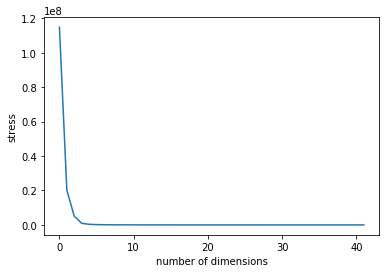

In [107]:
#Measure stress as m increase (m=3 is quite good)
stress=[]
for i in range(42):
    embedding = MDS(n_components=i+1)
    X_transformed = embedding.fit_transform(data['D'])
    stress.append(embedding.stress_)
plt.plot(stress)
plt.xlabel('number of dimensions')
plt.ylabel('stress')
plt.show()

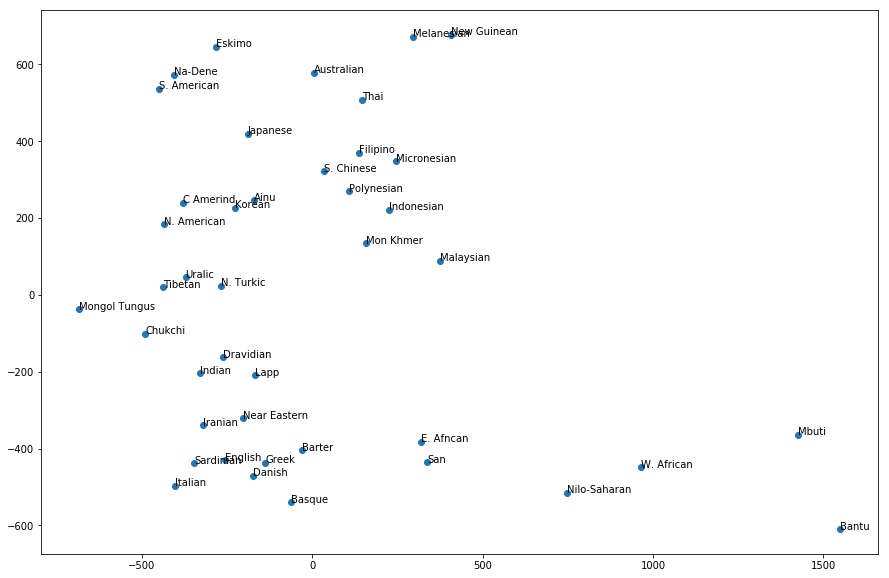

In [118]:
embedding = MDS(n_components=2)
X_transformed = embedding.fit_transform(data['D'])
fig = plt.figure(figsize=(15, 10))
plt.scatter(X_transformed[:,0],X_transformed[:,1])
for i, txt in enumerate(data['population_list']):
    plt.annotate(txt, (X_transformed[i,0],X_transformed[i,1]))
plt.show()

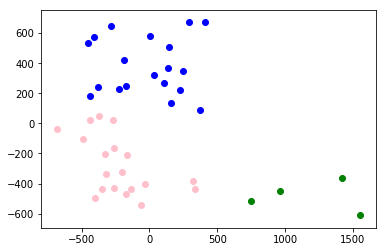

In [119]:
#(b)
kmeanModel = KMeans(n_clusters=3).fit(X_transformed)
kmeanModel.fit(X_transformed)
#plt.scatter(X_transformed[:,0],X_transformed[:,1])
plt.scatter(X_transformed[kmeanModel.labels_==0][:,0],X_transformed[kmeanModel.labels_==0][:,1],c='pink')
plt.scatter(X_transformed[kmeanModel.labels_==1][:,0],X_transformed[kmeanModel.labels_==1][:,1],c=u'b')
plt.scatter(X_transformed[kmeanModel.labels_==2][:,0],X_transformed[kmeanModel.labels_==2][:,1],c='green')


In [120]:
print(data['population_list'][kmeanModel.labels_==0])
print(data['population_list'][kmeanModel.labels_==1])
print(data['population_list'][kmeanModel.labels_==2])

['E. Afncan' 'San' 'Barter' 'Indian' 'Iranian' 'Near Eastern' 'Uralic'
 'Dravidian' 'Mongol Tungus' 'Tibetan' 'N. Turkic' 'Basque' 'Lapp'
 'Sardinian' 'Danish' 'English' 'Greek' 'Italian' 'Chukchi']
['Ainu' 'Japanese' 'Korean' 'Mon Khmer' 'Thai' 'Indonesian' 'Malaysian'
 'Filipino' 'S. Chinese' 'C Amerind' 'Eskimo' 'Na-Dene' 'N. American'
 'S. American' 'Melanesian' 'Micronesian' 'Polynesian' 'New Guinean'
 'Australian']
['Bantu' 'Nilo-Saharan' 'W. African' 'Mbuti']


/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


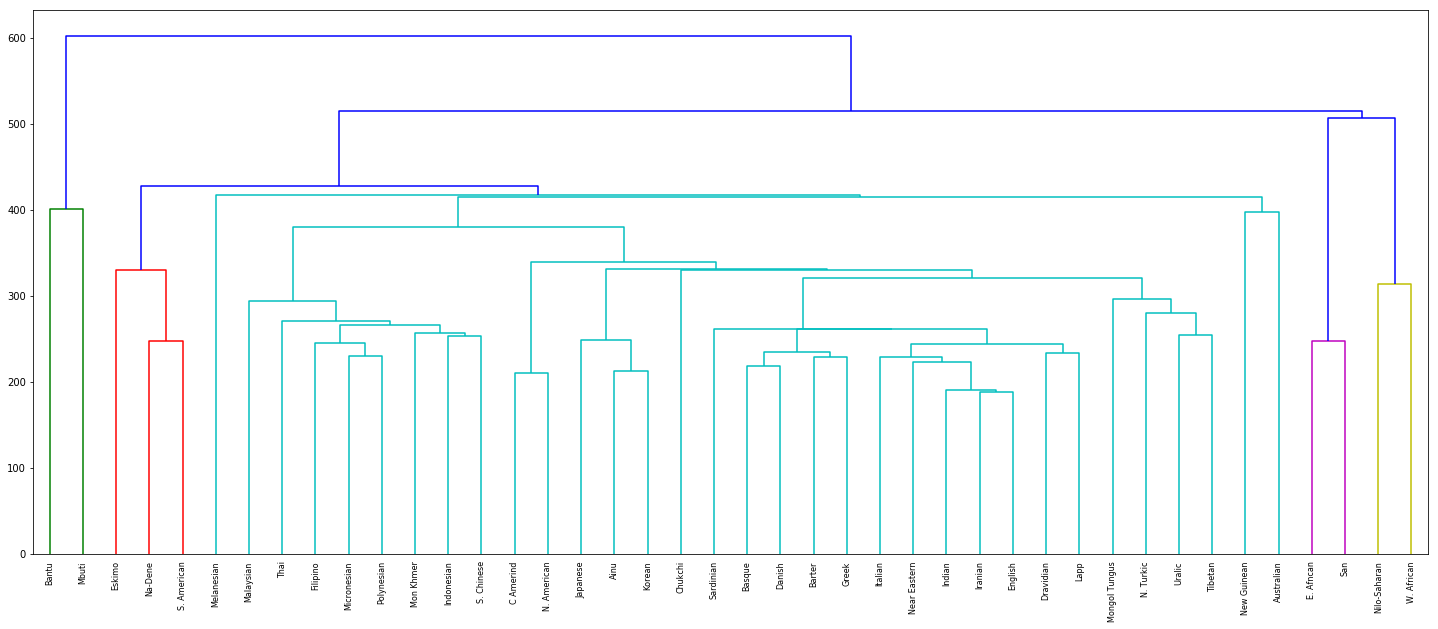

In [55]:
#(c)
Z = linkage(data['D'], 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z,labels=data['population_list'])
plt.show()

In [76]:
F=fcluster(Z,1.1)

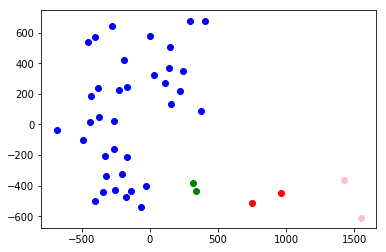

In [121]:
plt.scatter(X_transformed[F==1][:,0],X_transformed[F==1][:,1],c='pink')
plt.scatter(X_transformed[F==2][:,0],X_transformed[F==2][:,1],c=u'b')
plt.scatter(X_transformed[F==3][:,0],X_transformed[F==3][:,1],c='green')
plt.scatter(X_transformed[F==4][:,0],X_transformed[F==4][:,1],c='red')


In [126]:
#(d)
medoids = random.sample(range(43),3)
M,C = kmedoids.kMedoids(data['D'], 3)

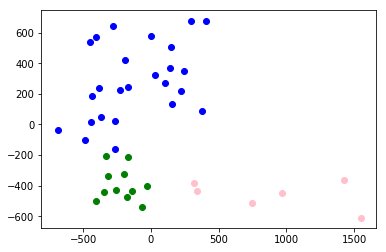

In [127]:
plt.scatter(X_transformed[C[0]][:,0],X_transformed[C[0]][:,1],c='pink')
plt.scatter(X_transformed[C[1]][:,0],X_transformed[C[1]][:,1],c=u'b')
plt.scatter(X_transformed[C[2]][:,0],X_transformed[C[2]][:,1],c='green')

In [106]:
print(data['population_list'][C[0]])
print(data['population_list'][C[1]])
print(data['population_list'][C[2]])

['Bantu' 'E. Afncan' 'Nilo-Saharan' 'W. African' 'San' 'Mbuti']
['Barter' 'Indian' 'Iranian' 'Near Eastern' 'Basque' 'Lapp' 'Sardinian'
 'Danish' 'English' 'Greek' 'Italian']
['Uralic' 'Ainu' 'Japanese' 'Korean' 'Mon Khmer' 'Thai' 'Dravidian'
 'Mongol Tungus' 'Tibetan' 'Indonesian' 'Malaysian' 'Filipino' 'N. Turkic'
 'S. Chinese' 'C Amerind' 'Eskimo' 'Na-Dene' 'N. American' 'S. American'
 'Chukchi' 'Melanesian' 'Micronesian' 'Polynesian' 'New Guinean'
 'Australian']
